Regression Using Tensorflow 

* Architecture of a Neural Network Regression Model
* Input & Output Shapes of a Regression Model
* Preprocessing data 
* Creating a Regression model
* Compiling Model
* Fitting Model
* Evaluating Model
* Different Evaluation Methods
* Saving & Loading Modela

### Few Definitions
* **Loss** - how wrong your model's prediction are compared to the truth label - We want to minimise this
* **Optimizer** - houw your model should update its internal patterns to better its predictions
* **Metrics** - human interpretable values for how well your model is doing
* **Epochs** - how many times the model should through all of the training examples

In [2]:
## Introduction to Regression with Neural Networks in Tensorflow

In [3]:
# Import Tensorflow
import tensorflow as tf

print(tf.__version__)

2.8.2


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Create some dummy values for input & desired output

# y = 2x + 71
x_val = [20, 4, 2.2, 7, 99, 44, 31, 9.9, 51, 73]

In [6]:
# lets calculate output for these input values
y_val = []
for i in x_val:
  y_val.append(2*i +71)



In [7]:
# Calculated y_val values are 
y_val

[111, 79, 75.4, 85, 269, 159, 133, 90.8, 173, 217]

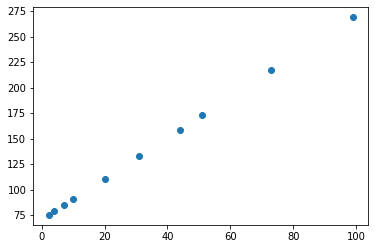

In [8]:
# Lets plot values of x_val & y_val

plt.scatter(x_val, y_val)

In [9]:
# We will build our neural network & want our model to learn 
# relationship y = 2x + 7
# With above input we want model to predict out with learned pattern

In [10]:
X = np.array(x_val)
Y = np.array(y_val)
X, Y

(array([20. ,  4. ,  2.2,  7. , 99. , 44. , 31. ,  9.9, 51. , 73. ]),
 array([111. ,  79. ,  75.4,  85. , 269. , 159. , 133. ,  90.8, 173. ,
        217. ]))

In [11]:
# Looking at the shapes of X & Y

X.shape, Y.shape

((10,), (10,))

In [12]:
# Lets convert our arrays into tensors
X = tf.constant(X)
y = tf.constant(Y)
X, y

(<tf.Tensor: shape=(10,), dtype=float64, numpy=array([20. ,  4. ,  2.2,  7. , 99. , 44. , 31. ,  9.9, 51. , 73. ])>,
 <tf.Tensor: shape=(10,), dtype=float64, numpy=
 array([111. ,  79. ,  75.4,  85. , 269. , 159. , 133. ,  90.8, 173. ,
        217. ])>)

In [13]:
print(X.shape, X.ndim, '--' ,y.shape, y.ndim)

(10,) 1 -- (10,) 1


In [14]:
# Looking at the shapes of one elements 
input_shape = X[0].shape
output_shape = y[0].shape
input_shape , output_shape

(TensorShape([]), TensorShape([]))

##  Steps in modelling with TensorFlow
Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

* Creating a model - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).
* Compiling a model - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
* Fitting a model - letting the model try to find patterns in the data (how does X get to y).
Let's see these in action using the Keras Sequential API to build a model for our regression data. And then we'll step through each

In [15]:
# Setting the seed for reproducibility of results
tf.random.set_seed(101)

In [16]:
X.shape

TensorShape([10])

In [17]:
tf.expand_dims(X, axis = -1)

<tf.Tensor: shape=(10, 1), dtype=float64, numpy=
array([[20. ],
       [ 4. ],
       [ 2.2],
       [ 7. ],
       [99. ],
       [44. ],
       [31. ],
       [ 9.9],
       [51. ],
       [73. ]])>

In [18]:
X

<tf.Tensor: shape=(10,), dtype=float64, numpy=array([20. ,  4. ,  2.2,  7. , 99. , 44. , 31. ,  9.9, 51. , 73. ])>

In [19]:
tf.expand_dims(X, axis = -1).shape

TensorShape([10, 1])

In [20]:
X.shape

TensorShape([10])

In [21]:
X = tf.expand_dims(X, axis = -1)

In [22]:
# Create a model using the Sequential API
# losses - mae - absolute mean error
# Optimizer - SGD - Stochastic Gradient Descent

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# Fit the model
model.fit(X, y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 614ms/step - loss: 142.3487 - mae: 142.3487
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 130.7037 - mae: 130.7037
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 119.0588 - mae: 119.0588
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 107.4139 - mae: 107.4139
Epoch 5/5
1/1 [==============================] - 0s 14ms/step - loss: 95.7690 - mae: 95.7690


In [23]:
# Lets predict our output values
X, y

(<tf.Tensor: shape=(10, 1), dtype=float64, numpy=
 array([[20. ],
        [ 4. ],
        [ 2.2],
        [ 7. ],
        [99. ],
        [44. ],
        [31. ],
        [ 9.9],
        [51. ],
        [73. ]])>, <tf.Tensor: shape=(10,), dtype=float64, numpy=
 array([111. ,  79. ,  75.4,  85. , 269. , 159. , 133. ,  90.8, 173. ,
        217. ])>)

In [24]:
model.predict(tf.expand_dims([20], axis = -1))

array([[32.325546]], dtype=float32)

In [25]:
# y = 2x + 71

In [26]:
tf.expand_dims([20], axis = -1)

<tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[20]], dtype=int32)>

In [27]:
# As we can see our values are almost 95 off

## To improve our model, we alter almost every part of the 3 steps we went through before.

* **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
* **Compiling a model** - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
* **Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

## Improving Our Model

In [28]:
# Rebulding the model for better performance

In [29]:
# Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])
# Fit the model
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 365ms/step - loss: 97.3207 - mae: 97.3207
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 85.6758 - mae: 85.6758
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 74.0308 - mae: 74.0308
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 62.3859 - mae: 62.3859
Epoch 5/100
1/1 [==============================] - 0s 30ms/step - loss: 50.7410 - mae: 50.7410
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 43.3965 - mae: 43.3965
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 42.8775 - mae: 42.8775
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 42.8731 - mae: 42.8731
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 42.8686 - mae: 42.8686
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 42.8642 - mae: 42.8642
Epoch 11/100
1/1 [==============================] - 

In [30]:
X, y

(<tf.Tensor: shape=(10, 1), dtype=float64, numpy=
 array([[20. ],
        [ 4. ],
        [ 2.2],
        [ 7. ],
        [99. ],
        [44. ],
        [31. ],
        [ 9.9],
        [51. ],
        [73. ]])>, <tf.Tensor: shape=(10,), dtype=float64, numpy=
 array([111. ,  79. ,  75.4,  85. , 269. , 159. , 133. ,  90.8, 173. ,
        217. ])>)

In [31]:
# Lets see whether our model's prediction has imporved
model.predict(tf.expand_dims([20], axis = -1))

array([[62.553223]], dtype=float32)

In [32]:
# Lets change the optimizer & see if the performance of the models enhances
model = tf.keras.Sequential(
    tf.keras.layers.Dense(1)
)

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
              metrics = ['mae'])

model.fit(X,y, epochs = 100)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 0s 357ms/step - loss: 92.3874 - mae: 92.3874
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 92.3839 - mae: 92.3839
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 92.3803 - mae: 92.3803
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 92.3768 - mae: 92.3768
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 92.3733 - mae: 92.3733
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 92.3698 - mae: 92.3698
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 92.3663 - mae: 92.3663
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 92.3628 - mae: 92.3628
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 92.3593 - mae: 92.3593
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 92.3558 - mae: 92.3558
Epoch 11/100
1/1 [==============================] - 0

In [33]:
# Lets add more Dense Layers & Activation Layers & see if the performance of the models enhances
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)]
)

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.001),
              metrics = ['mae'])

model.fit(X,y, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 528ms/step - loss: 160.4643 - mae: 160.4643
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 159.7009 - mae: 159.7009
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 158.9388 - mae: 158.9388
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 158.1773 - mae: 158.1773
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 157.4165 - mae: 157.4165
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 156.6559 - mae: 156.6559
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 155.8956 - mae: 155.8956
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 155.1355 - mae: 155.1355
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 154.3752 - mae: 154.3752
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 153.6148 - mae: 153.6148
Epoch 11/100
1/1 [=======================

In [34]:
# Lets see whether our model's prediction has imporved
model.predict(tf.expand_dims([20], axis = -1))

array([[43.16188]], dtype=float32)

In [35]:
# Looks like the performance of the model is rather going down.
# Lets add activation funcitons ReLU
# Lets add more Dense Layers & Activation Layers & see if the performance of the models enhances
model_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)]
)

model_reg.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ['mae'])

model_reg.fit(X,y, epochs = 1000)

Epoch 1/1000
1/1 [==============================] - 0s 484ms/step - loss: 142.2459 - mae: 142.2459
Epoch 2/1000
1/1 [==============================] - 0s 7ms/step - loss: 130.7875 - mae: 130.7875
Epoch 3/1000
1/1 [==============================] - 0s 8ms/step - loss: 120.2838 - mae: 120.2838
Epoch 4/1000
1/1 [==============================] - 0s 8ms/step - loss: 105.3297 - mae: 105.3297
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 84.0296 - mae: 84.0296
Epoch 6/1000
1/1 [==============================] - 0s 9ms/step - loss: 54.0538 - mae: 54.0538
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 46.1509 - mae: 46.1509
Epoch 8/1000
1/1 [==============================] - 0s 19ms/step - loss: 61.4335 - mae: 61.4335
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 63.3706 - mae: 63.3706
Epoch 10/1000
1/1 [==============================] - 0s 9ms/step - loss: 55.0649 - mae: 55.0649
Epoch 11/1000
1/1 [==================

In [36]:
# When We Increased the number of Epochs the performance of the model increases

In [37]:
X, y

(<tf.Tensor: shape=(10, 1), dtype=float64, numpy=
 array([[20. ],
        [ 4. ],
        [ 2.2],
        [ 7. ],
        [99. ],
        [44. ],
        [31. ],
        [ 9.9],
        [51. ],
        [73. ]])>, <tf.Tensor: shape=(10,), dtype=float64, numpy=
 array([111. ,  79. ,  75.4,  85. , 269. , 159. , 133. ,  90.8, 173. ,
        217. ])>)

In [38]:
# Lets see whether our model's prediction has imporved
model_reg.predict(tf.expand_dims([20], axis = -1))

array([[107.072556]], dtype=float32)

In [39]:
#y = 2x + 71
X_new = 107
y_actual = 2*X_new +71

y_pred = model_reg.predict(tf.expand_dims([107], axis = -1))
y_actual, print(y_pred)

[[274.24597]]


(285, None)

In [40]:
# Lets create a bigger dummy dataset & work with it

In [41]:
X = tf.range(-100,100, 4)

y = X + 17

X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-83, -79, -75, -71, -67, -63, -59, -55, -51, -47, -43, -39, -35,
        -31, -27, -23, -19, -15, -11,  -7,  -3,   1,   5,   9,  13,  17,
         21,  25,  29,  33,  37,  41,  45,  49,  53,  57,  61,  65,  69,
         73,  77,  81,  85,  89,  93,  97, 101, 105, 109, 113], dtype=int32)>)

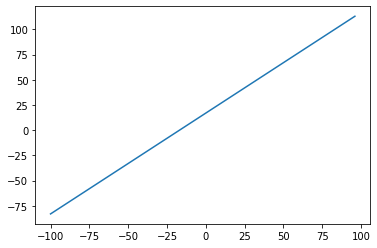

In [42]:
# Visualising our data
plt.plot(X,y)

In [43]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

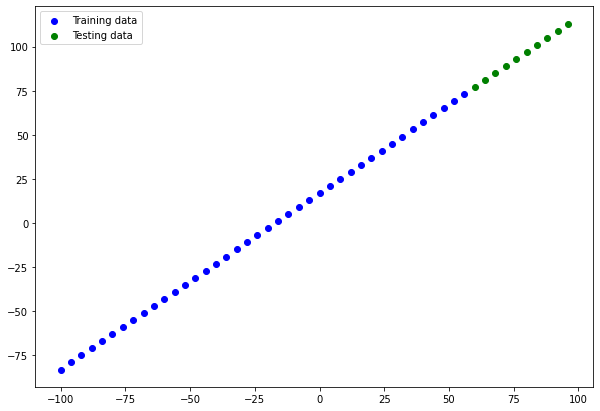

In [44]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [45]:


# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (same as above)
#model.fit(X_train, y_train, epochs=100) # commented out on purpose (not fitting it just yet)

In [46]:
# model.summary()

In [47]:
# model.build()

In [48]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-83>)

In [49]:
# We have to provide the input shape to the model
# Input shape must be 1 as we are passing only one number
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, input_shape= [1])
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

In [50]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


**Total params** - total number of parameters in the model.

**Trainable parameters** - these are the parameters (patterns) the model can update as it trains.

**Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

🛠 **Exercise:** Try playing around with the number of hidden units in the Dense layer (e.g. Dense(2), Dense(3)). How does this change the Total/Trainable params? Investigate what's causing the change.

In [51]:
# Fit the model to train the data
model.fit(X_train, y_train, epochs = 100, verbose = 1)

Epoch 1/100
2/2 [==============================] - 1s 8ms/step - loss: 37.1328 - mae: 37.1328
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 13.8865 - mae: 13.8865
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: 14.3675 - mae: 14.3675
Epoch 4/100
2/2 [==============================] - 0s 15ms/step - loss: 13.4755 - mae: 13.4755
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 15.3901 - mae: 15.3901
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 15.0863 - mae: 15.0863
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 14.7699 - mae: 14.7699
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 13.9429 - mae: 13.9429
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 13.1819 - mae: 13.1819
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 14.1325 - mae: 14.1325
Epoch 11/100
2/2 [==============================] - 0s 8m

In [52]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


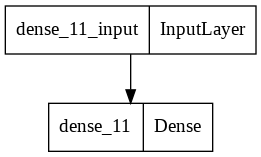

In [53]:
# Plotting the model

from tensorflow.keras.utils import plot_model
plot_model(model = model)

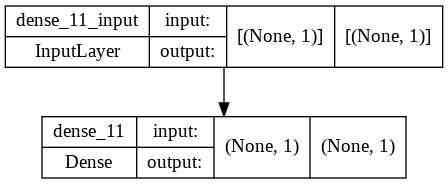

In [54]:
plot_model(model = model, show_shapes=True)

In [55]:
# We have to provide the input shape to the model
# Input shape must be 1 as we are passing only one number
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10, input_shape= [1], name = 'Input_Layer'),
                             tf.keras.layers.Dense(1, name = 'My_Output_Layer')
], name = "My_Model_01")

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])



In [56]:
# Fit the model to train the data
model.fit(X_train, y_train, epochs = 50, verbose = 1)

Epoch 1/50
2/2 [==============================] - 0s 12ms/step - loss: 45.9598 - mae: 45.9598
Epoch 2/50
2/2 [==============================] - 0s 8ms/step - loss: 54.8502 - mae: 54.8502
Epoch 3/50
2/2 [==============================] - 0s 7ms/step - loss: 22.9924 - mae: 22.9924
Epoch 4/50
2/2 [==============================] - 0s 5ms/step - loss: 18.0182 - mae: 18.0182
Epoch 5/50
2/2 [==============================] - 0s 4ms/step - loss: 15.2492 - mae: 15.2492
Epoch 6/50
2/2 [==============================] - 0s 6ms/step - loss: 18.7298 - mae: 18.7298
Epoch 7/50
2/2 [==============================] - 0s 6ms/step - loss: 15.6394 - mae: 15.6394
Epoch 8/50
2/2 [==============================] - 0s 6ms/step - loss: 14.7283 - mae: 14.7283
Epoch 9/50
2/2 [==============================] - 0s 5ms/step - loss: 18.2145 - mae: 18.2145
Epoch 10/50
2/2 [==============================] - 0s 6ms/step - loss: 15.8898 - mae: 15.8898
Epoch 11/50
2/2 [==============================] - 0s 4ms/step - los

In [57]:
model.summary()

Model: "My_Model_01"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                20        
                                                                 
 My_Output_Layer (Dense)     (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


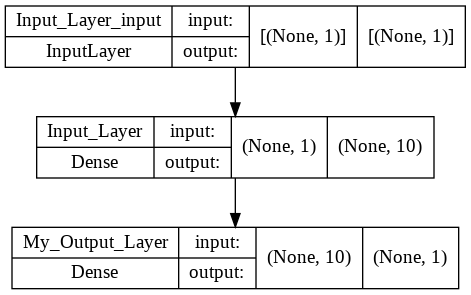

In [58]:
plot_model(model = model, show_shapes=True)

In [59]:
# Making predictions
y_pred = model.predict(X_test)
y_pred

array([[ 78.35598 ],
       [ 83.49805 ],
       [ 88.64011 ],
       [ 93.782166],
       [ 98.92423 ],
       [104.066284],
       [109.20834 ],
       [114.35041 ],
       [119.49247 ],
       [124.63454 ]], dtype=float32)

In [60]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 77,  81,  85,  89,  93,  97, 101, 105, 109, 113], dtype=int32)>

In [61]:
# Creating a plotting function

  
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_pred):
    
  """ 
  Plotting our training data, test data & comparing predicted data with actual values
  """

  plt.figure(figsize = (10, 8))

# Plot training data in blue
  plt.scatter(train_data, train_labels, c = 'b', label = 'Training Data')

# Plot testing data in green
  plt.scatter(test_data, test_labels, c = 'g', label = 'Testing Data')

# Plot prediction data in red
  plt.scatter(test_data, y_pred, c = 'r', label = 'Predictions ')

# show legend
  plt.legend()

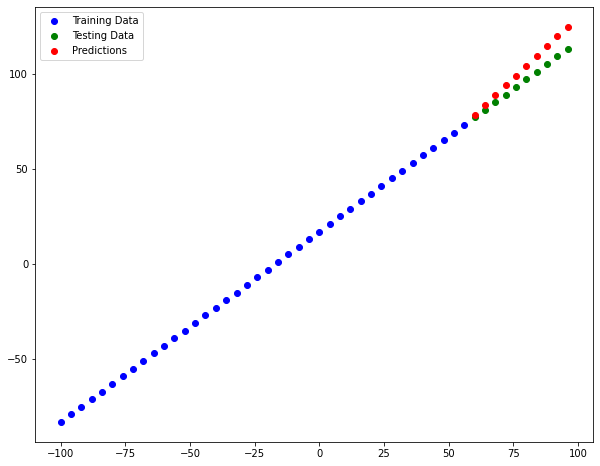

In [62]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

## Evaluating Model's predictions with Regression Evaluation Metrices

**Mean absolute error (MAE)** - the mean difference between each of the predictions.

**Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

In [63]:
# Evaluation Metrices
# Returns loss value & metrics value for the model in test mode
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 217ms/step - loss: 6.4953 - mae: 6.4953


[6.495258331298828, 6.495258331298828]

In [64]:
y_test.shape, y_pred.shape

(TensorShape([10]), (10, 1))

In [65]:
# Creating funcitons for MAE & MSE

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true,
                                        y_pred = y_pred)
  

def mse(y_true, y_pred):
  return tf.metrics.mean_square_error(y_true = y_true,
                                        y_pred = y_pred)

#  Saving Our Model
Saving our model help us to deploy in web applicaitons or mobile applicaitons

* There are two formats in which we can save our model:
1. The SaveModel Format
2. The HDF5 Format

In [66]:
# Saving model using the SaveModel format
model_reg.save("My_Linear_Model_SaveModel")

In [70]:
# Saving the model using the HDF5 Format
model_reg.save("My_Linear_Model_HDF5.h5")

# Loading The Model

In [71]:
loading_savemodel_format = tf.keras.models.load_model("/content/My_Linear_Model_SaveModel")

In [72]:
loading_savemodel_format.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


In [73]:
model_reg.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Comparing two models for evaluation purpose
model_reg_pred = model_reg.predict(X_test)
loaded_savedmodel_pred = loading_savemodel_format.predict(X_test)
model_reg_pred == loaded_savedmodel_pred


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [76]:
model_reg_pred , loaded_savedmodel_pred

(array([[182.31042],
        [189.93866],
        [197.64629],
        [205.42271],
        [213.22437],
        [221.08543],
        [228.96104],
        [236.83669],
        [244.71233],
        [252.588  ]], dtype=float32), array([[182.31042],
        [189.93866],
        [197.64629],
        [205.42271],
        [213.22437],
        [221.08543],
        [228.96104],
        [236.83669],
        [244.71233],
        [252.588  ]], dtype=float32))

In [77]:
# Loading HDF5 format Model
loading_hdf5_format = tf.keras.models.load_model("/content/My_Linear_Model_HDF5.h5")

In [78]:
loading_hdf5_format.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


In [81]:
# Comparing two models for evaluation purpose
model_reg_pred = model_reg.predict(X_test)
loaded_hdf5_pred = loading_hdf5_format.predict(X_test)
model_reg_pred == loaded_hdf5_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [82]:
# Downloading a google colab file to local using code
from google.colab import files
files.download("/content/My_Linear_Model_HDF5.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>